In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [2]:
'''data here is a DataFrame object'''

na_values = ['n/a']
data = pd.read_csv(r'csv_data2\weather.csv', encoding='utf-8', parse_dates=['date'], index_col='date', na_values=na_values)
data = data.sort_index()


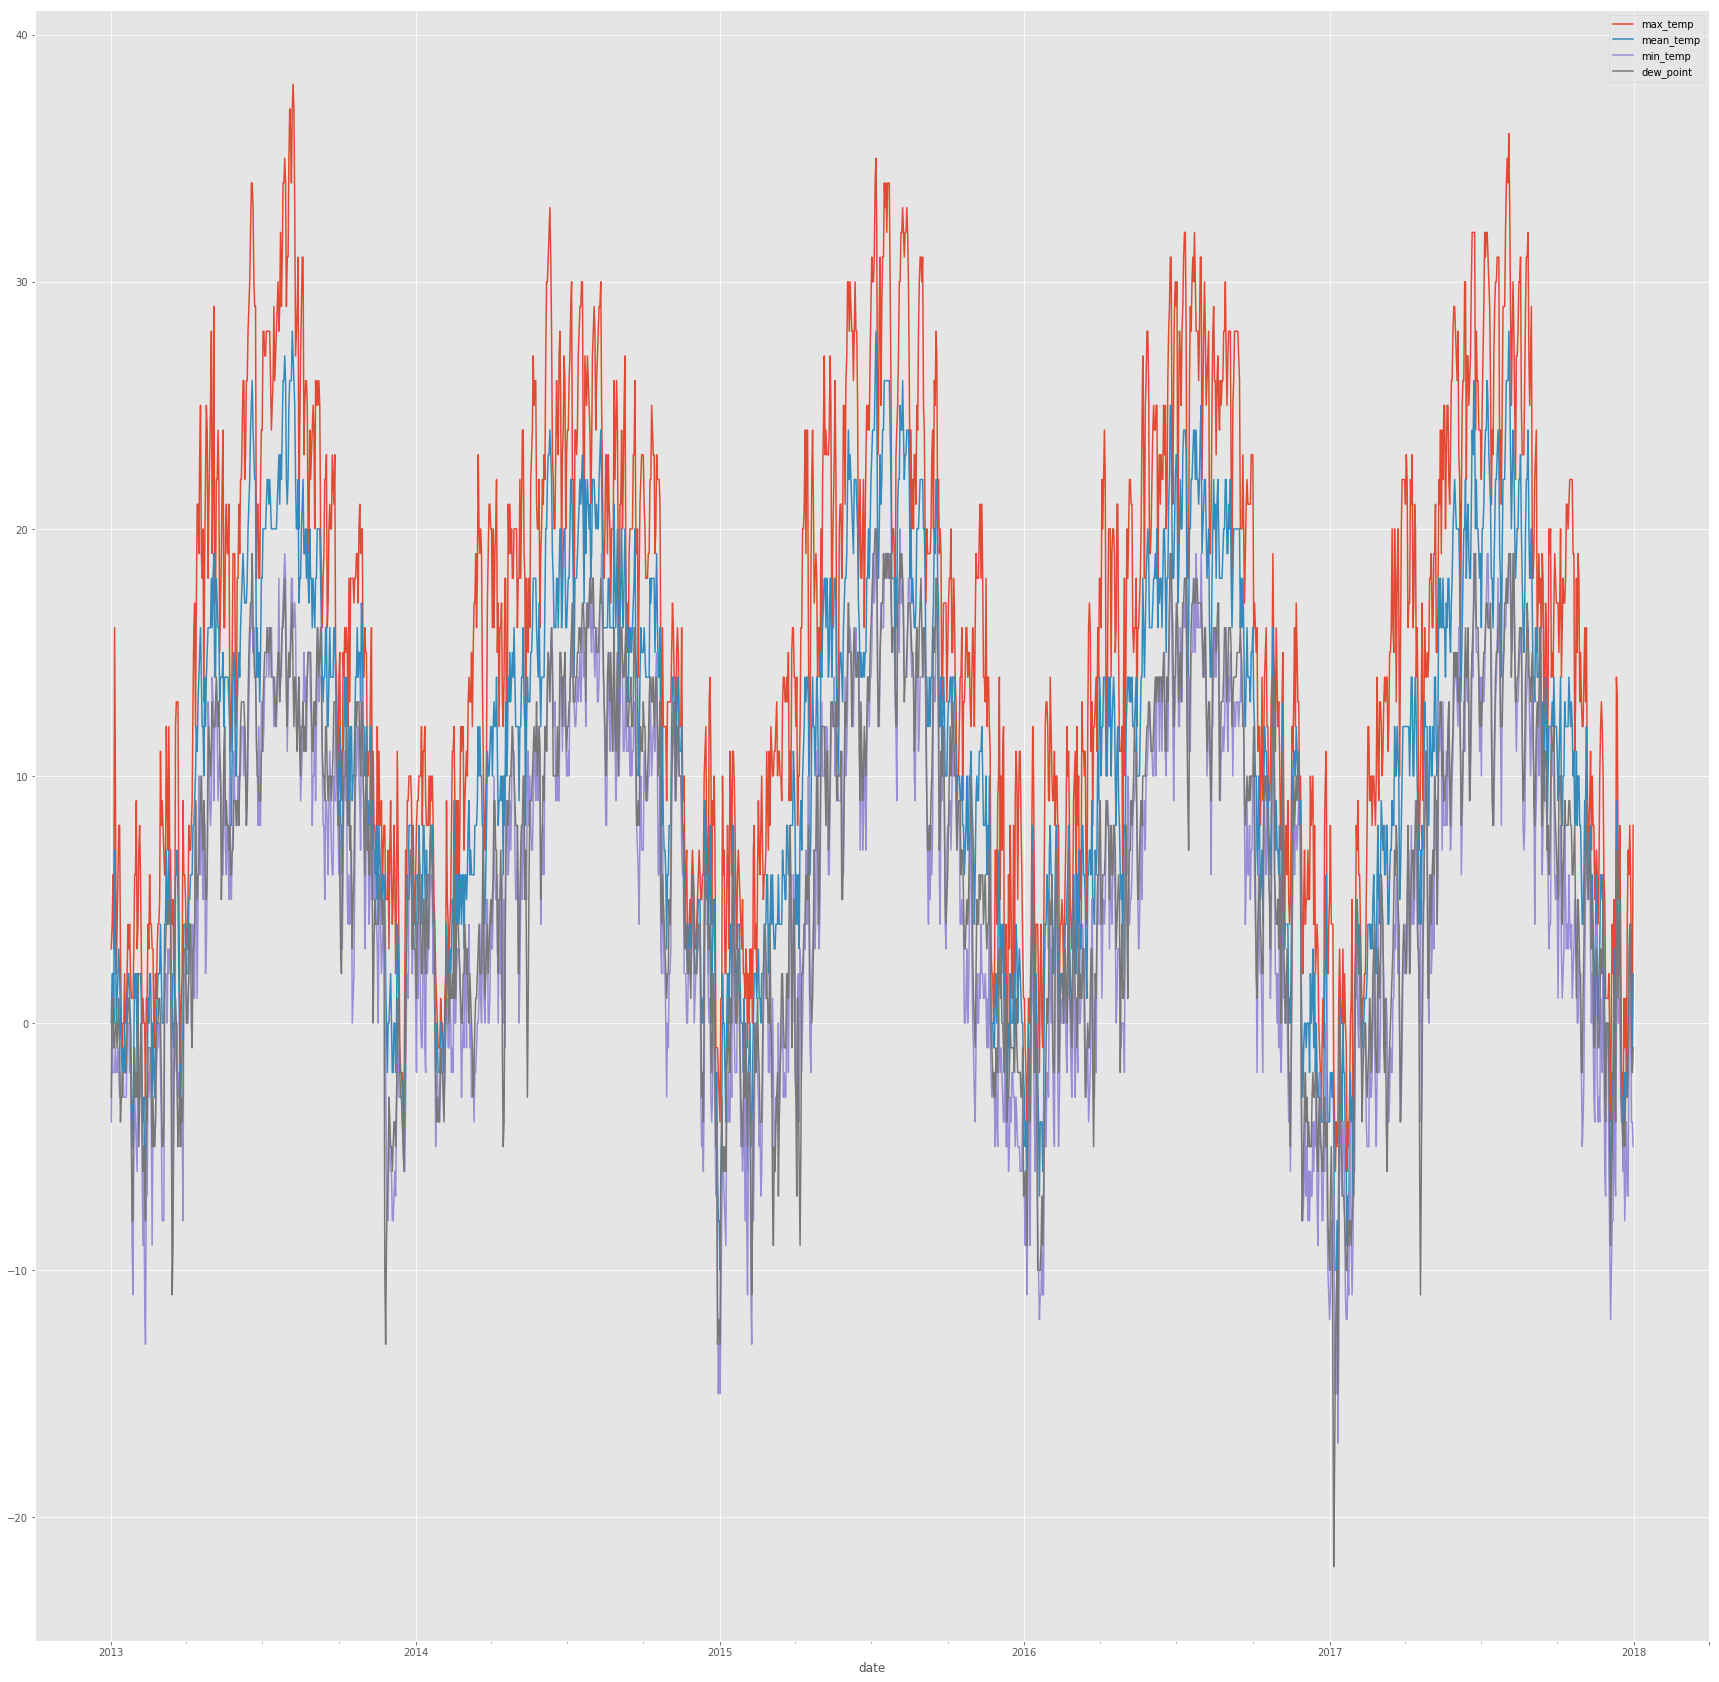

In [3]:
'''Let's see a basic chart showing a relationship between different daily temperatures and time.'''
data[['max_temp', 'mean_temp', 'min_temp', 'dew_point']].plot(figsize=(30,30))

In [4]:
'''Which year had the most cold days? What about hot ones?'''

data['min_temp'] = data['min_temp'].astype(int)
data['max_temp'] = data['max_temp'].astype(int)

#Temperature conditionals:
is_cold = data['min_temp'] <= -10
is_hot = data['max_temp'] >= 30

#Year conditionals:
is_2013 = data.index < '2014-01-01'
is_2014 = (data.index > '2013-12-31') & (data.index < '2015-01-01')
is_2015 = (data.index > '2014-12-31') & (data.index < '2016-01-01')
is_2016 = (data.index > '2015-12-31') & (data.index < '2017-01-01')
is_2017 = data.index > '2016-12-31'

#Some auxilary variables/structures:
year_cond = [is_2013, is_2014, is_2015, is_2016, is_2017]
cold_days, hot_days = [], []
year_i = 2013

for cond in year_cond:
    num_of_cold_days = len(data[is_cold & cond].index)
    cold_days.append(num_of_cold_days)
    print("Number of cold days in " + str(year_i) + " : " + str(num_of_cold_days))
    
    num_of_hot_days = len(data[is_hot & cond].index)
    hot_days.append(num_of_hot_days)
    print("Number of hot days in " + str(year_i) + " : " + str(num_of_hot_days))
    
    year_i += 1
print("Year with the most cold days is " + str(2013 + cold_days.index(max(cold_days))))
print("Year with the most hot days is " + str(2013 + hot_days.index(max(hot_days))))


Number of cold days in 2013 : 3
Number of hot days in 2013 : 26
Number of cold days in 2014 : 3
Number of hot days in 2014 : 10
Number of cold days in 2015 : 5
Number of hot days in 2015 : 39
Number of cold days in 2016 : 9
Number of hot days in 2016 : 16
Number of cold days in 2017 : 17
Number of hot days in 2017 : 31
Year with the most cold days is 2017
Year with the most hot days is 2015


The relationship has its peaks during the winter months, which makes sense, since the humidity should be the least stable during that time. Note the correlation between absolute distance between peaks in average humidity and the existence of peaks in the relationship dp/meantemp (next entry).


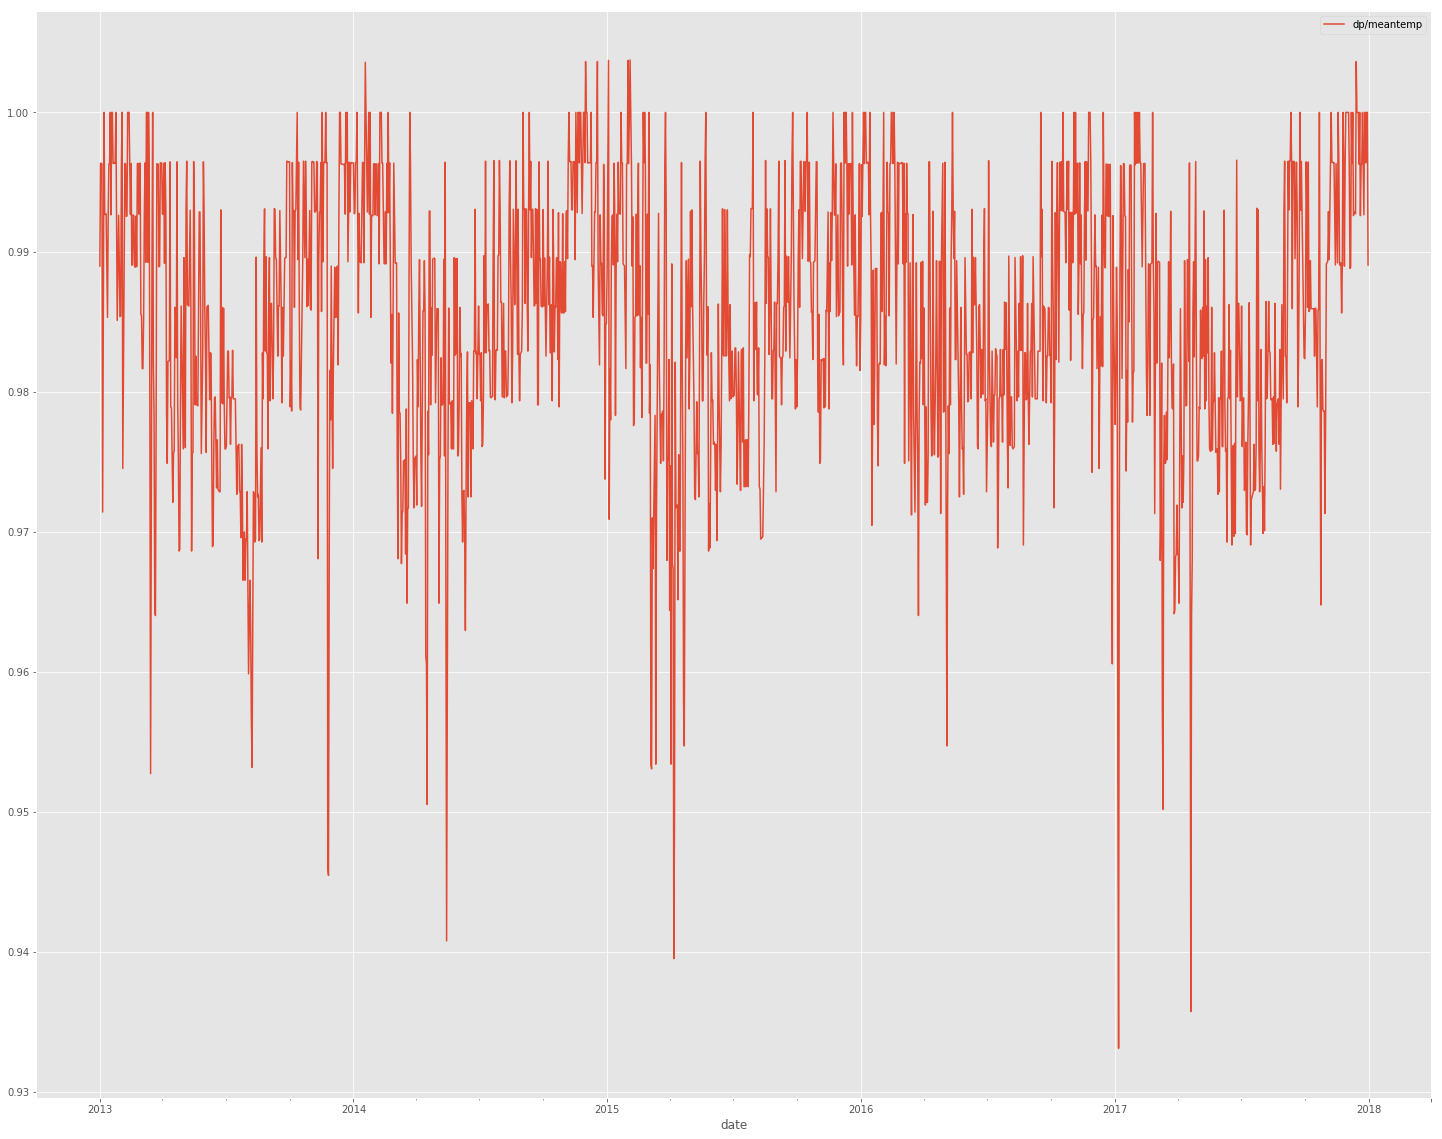

In [13]:
'''Let's look at the relationship between Dew Point temperature and Mean temperature:'''

data['dp/meantemp'] = pd.Series(data['dew_point'].map((lambda x: x+273))/data['mean_temp'].map((lambda x: x+273))).values
data[['dp/meantemp']].plot(figsize=(25,20))

print("The relationship has its peaks during the winter months, which makes sense, \
since the humidity should be the least stable during that time. \
Note the correlation between absolute distance between peaks in average humidity and the existence of peaks \
in the relationship dp/meantemp (next entry).")

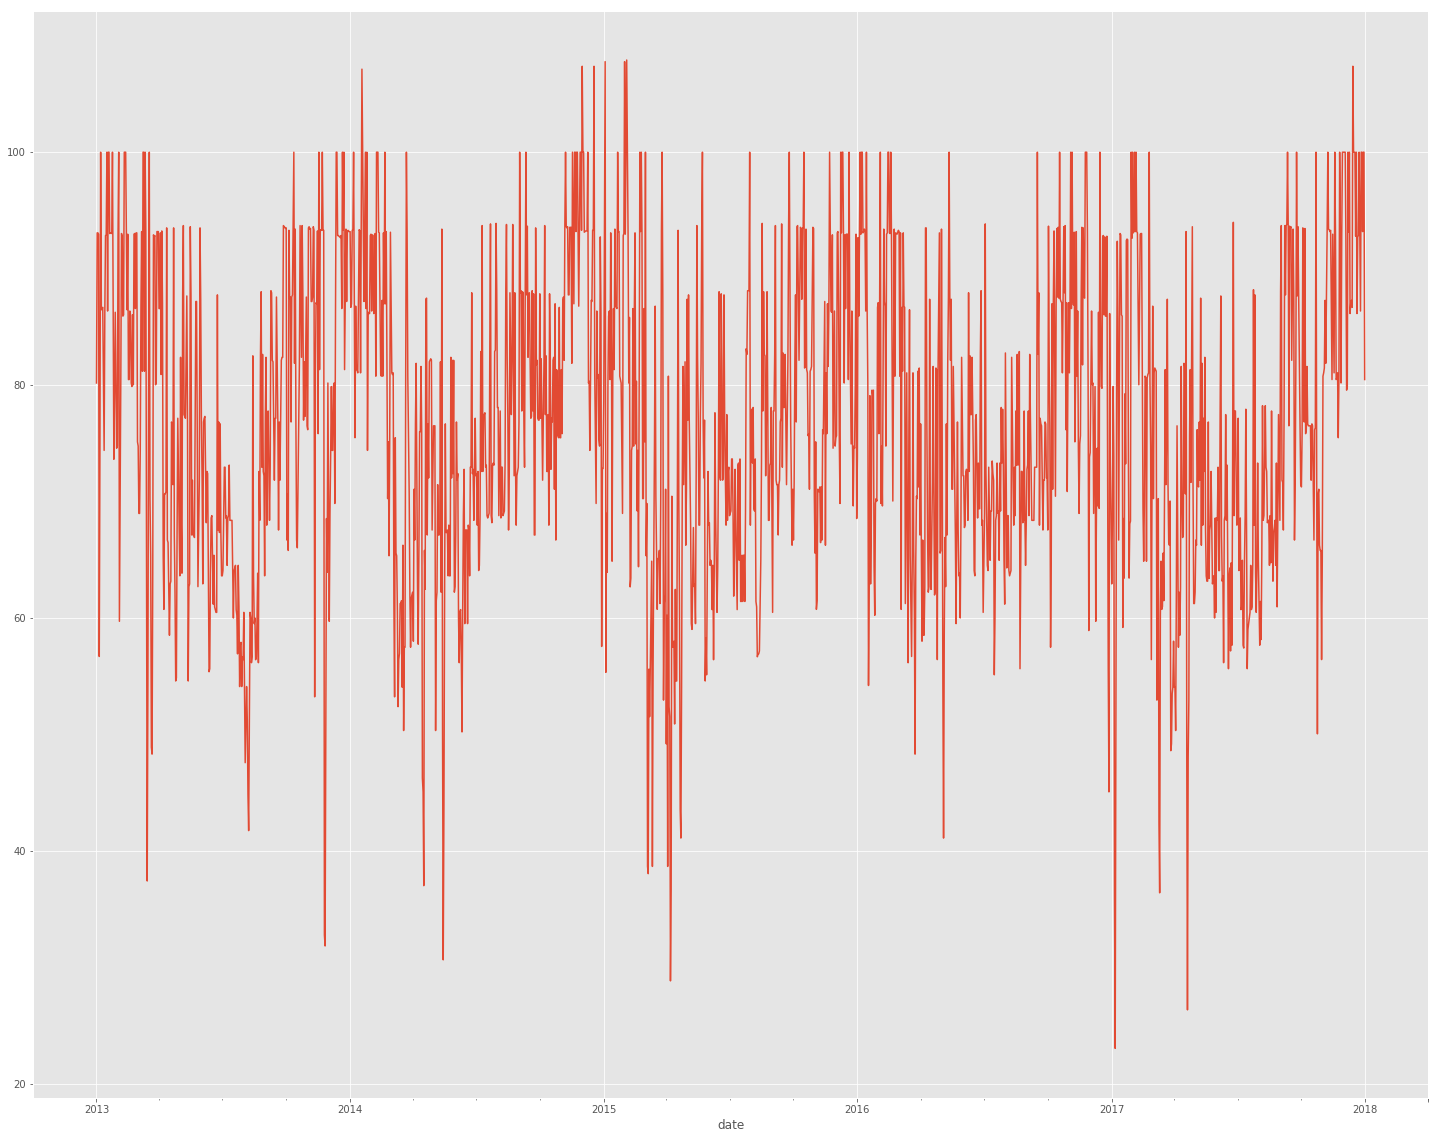

In [6]:
'''Calculating relative humidity from temperature and dew point temperature.'''

temps = data['mean_temp'].tolist()
dews = data['dew_point'].tolist()

for i in range(len(temps)):
    temps[i] = 6.11 * 10 ** (7.5 * (temps[i] / (237.7 + temps[i])))
    dews[i] = 6.11 * 10 ** (7.5 * (dews[i] / (237.7 + dews[i])))
sat_vap_pressure = temps
act_vap_pressure = dews
rel_humidity = []

for i in range(len(sat_vap_pressure)):
    rel_humidity.append((act_vap_pressure[i] / sat_vap_pressure[i]) * 100)

data['rel_humidity'] = pd.Series(rel_humidity).values
data['rel_humidity'].plot(figsize=(25, 20))

The shape is more or less the same with a few loose peaks.
Cause of this can probably be traced to faults while gathering data.
Relative humidity can't be greater than 100%.


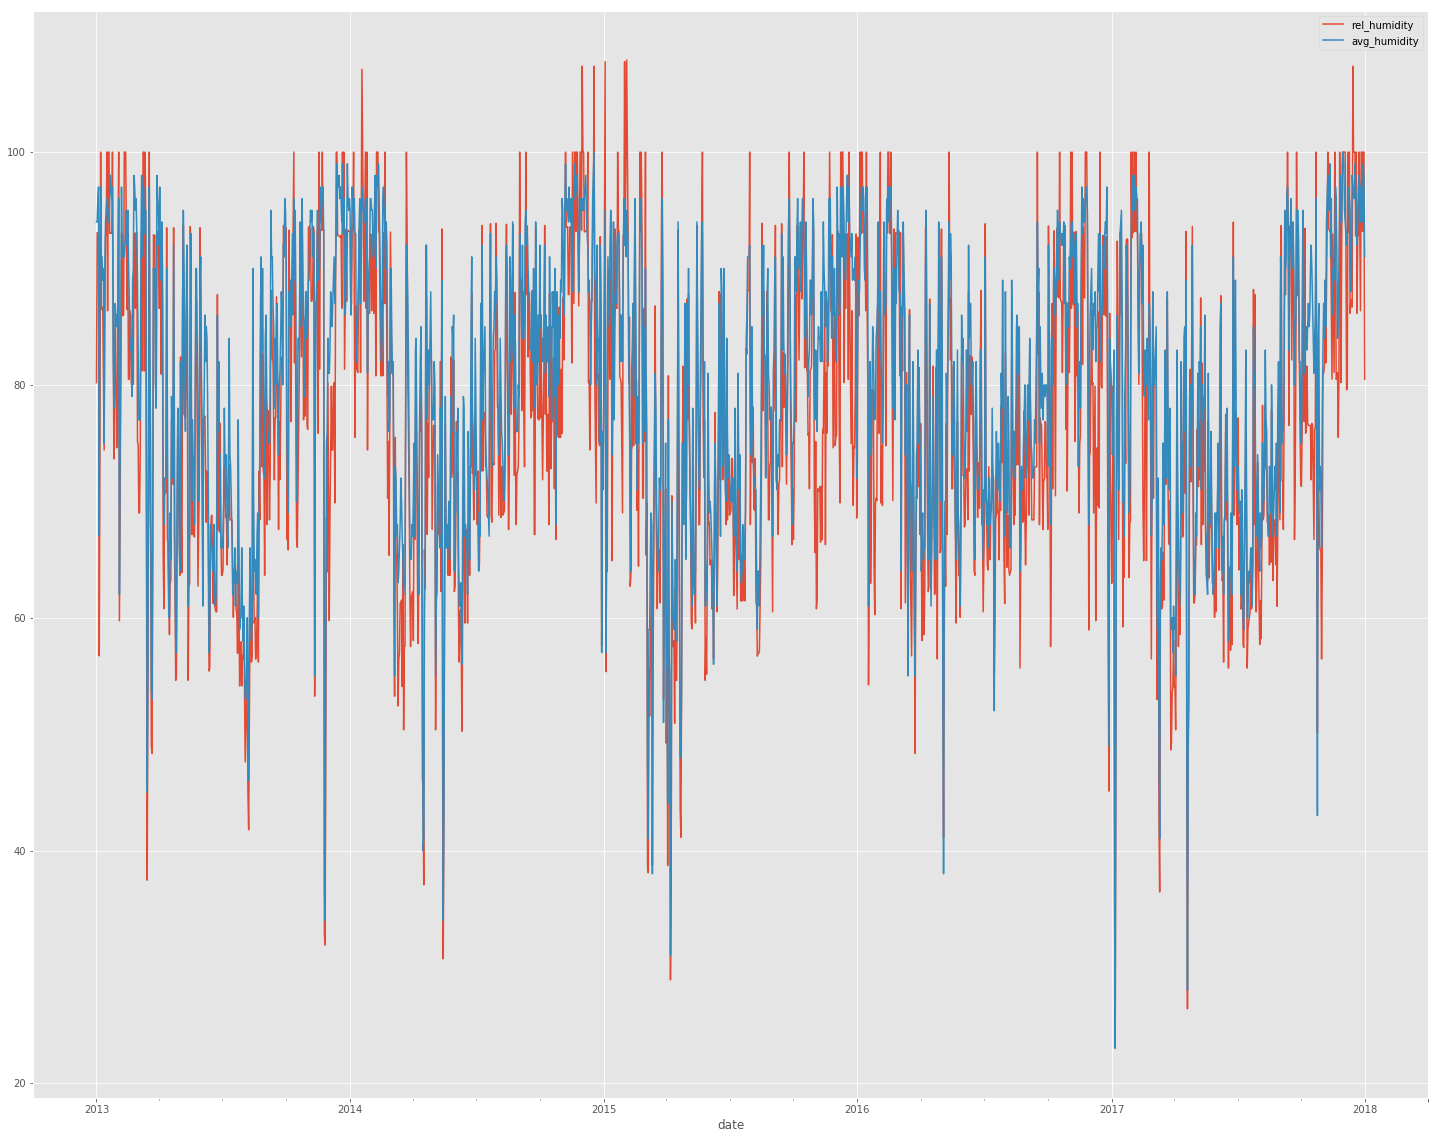

In [12]:
'''Now to compare results...'''

data[['rel_humidity', 'avg_humidity']].plot(figsize=(25, 20))

print("The shape is more or less the same with a few loose peaks.\nCause of this can probably be traced to faults while gathering data.\nRelative humidity can't be greater than 100%.")

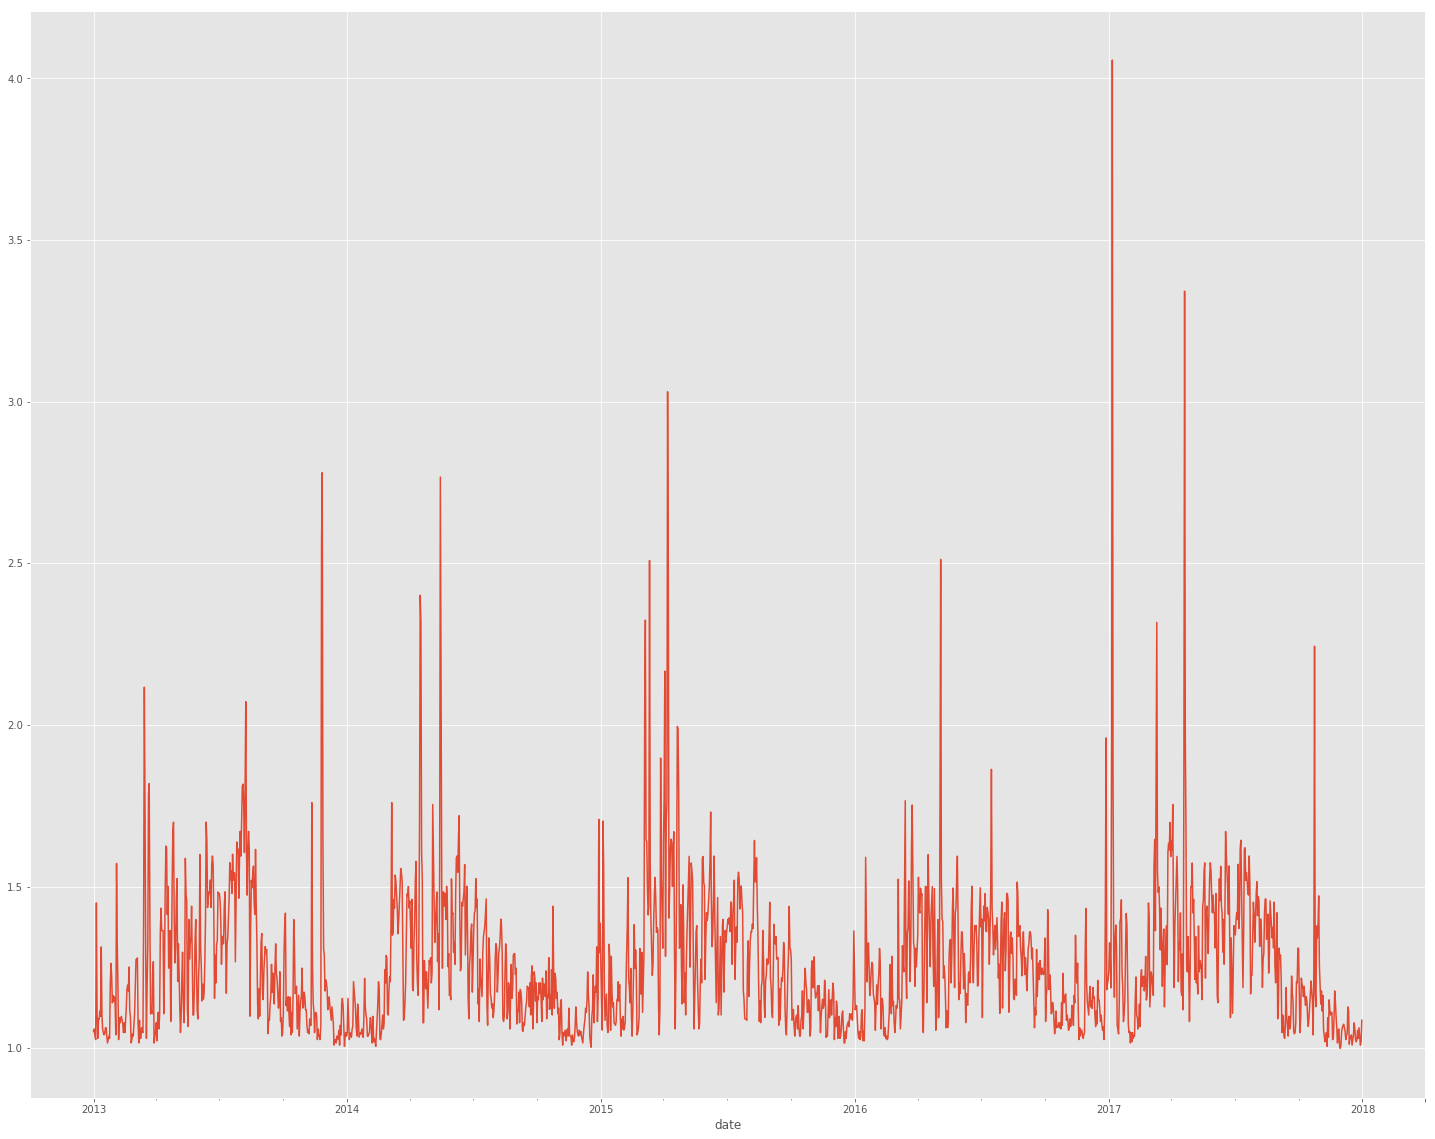

In [8]:
'''Therefore if they are in correlation, their quotient should be a const. function which,
with minor discrepancies, it is.'''

(data['dp/meantemp'] / data['avg_humidity'].map(lambda x: x/ 100)).plot(figsize=(25, 20))

The relationship between visibility and relative humidity is supposed to be linear.
The graph shows, with a few fluctuations during winter, that is really the case.
The fluctuations appear because when relative humidity is much higher than 60% the correlation becomes significantly non-linear, as suggested by the article cited bellow. As we can see from the graphs above relative humidity is much higher during winter months.

[1] .Relationship between visibility and relative humidity, PM10, PM2.5 in Tianjin[J]  Journal of Meteorology and Environment, 2013,V29(2): 34-41


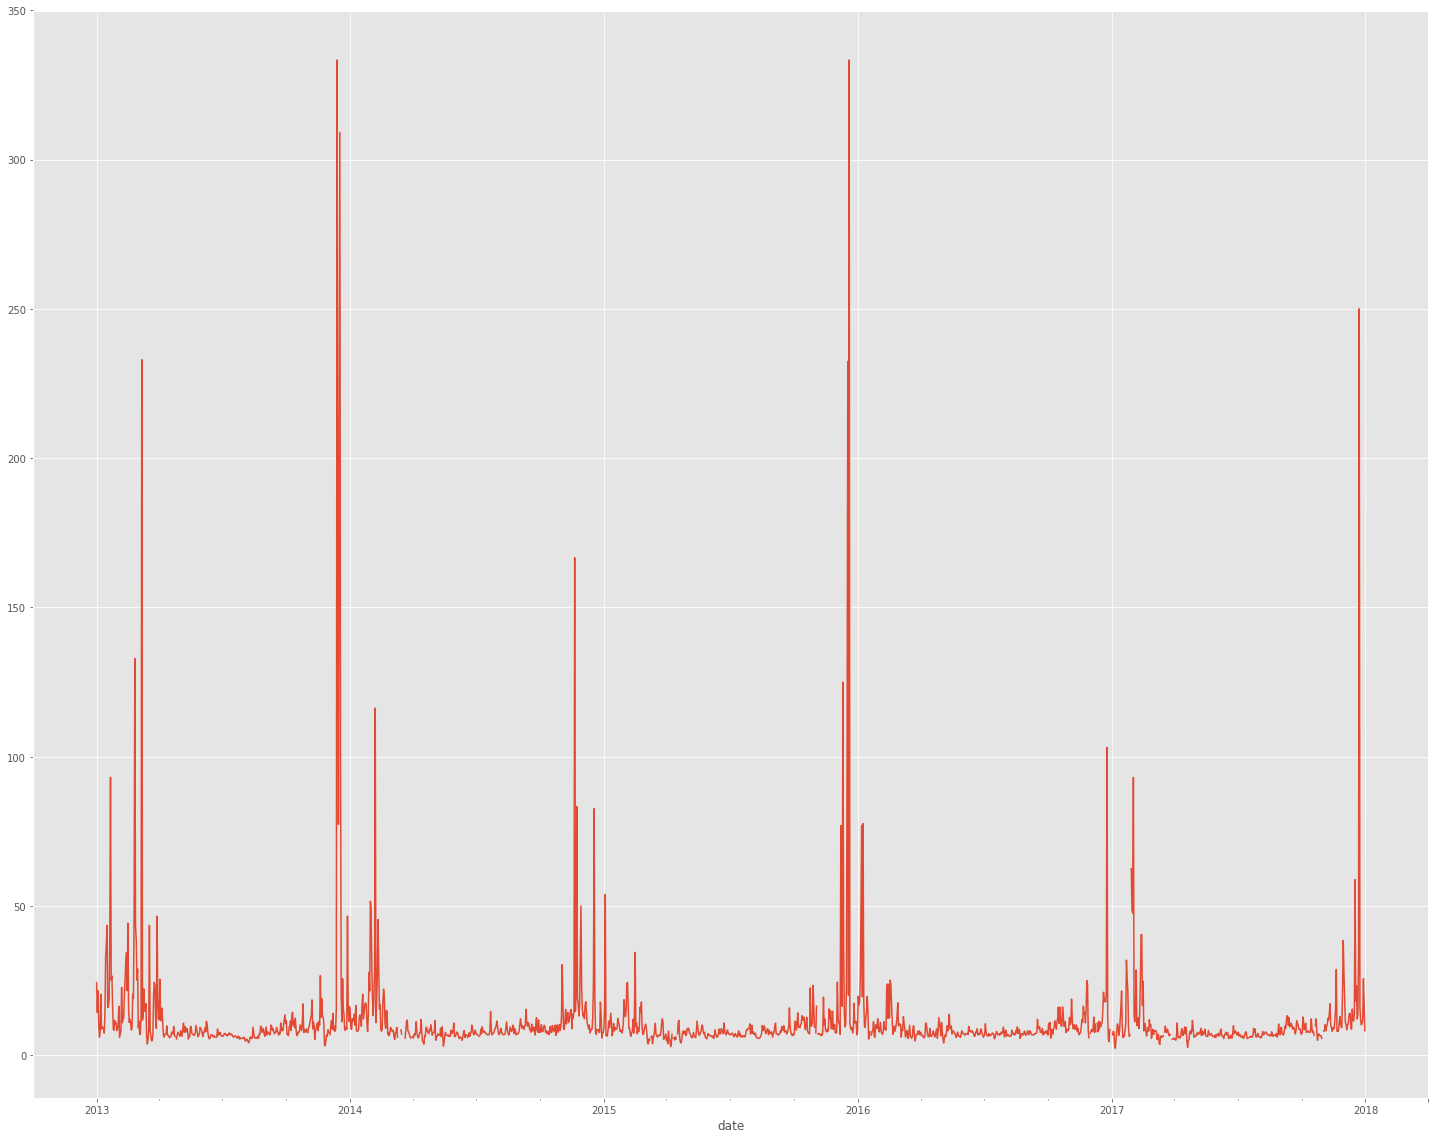

In [22]:
'''Relationship between visibility and relative humidity.'''

data['relhum/vis'] = pd.Series(data['rel_humidity'] / data['visibility']).values
data['relhum/vis'].plot(figsize=(25, 20))

print("The relationship between visibility and relative humidity is supposed to be linear.")
print("The graph shows, with a few fluctuations during winter, that is really the case.")
print("The fluctuations appear because when relative humidity is much higher than 60% the correlation becomes significantly non-linear, as suggested by the article cited bellow. As we can see from the graphs above relative humidity is much higher during winter months.")
print("")
print("[1] .Relationship between visibility and relative humidity, PM10, PM2.5 in Tianjin[J]  Journal of Meteorology and Environment, 2013,V29(2): 34-41")

Wind speed and visibility appear to be in more or less linear correlation as well, again with fluctuations during winter.


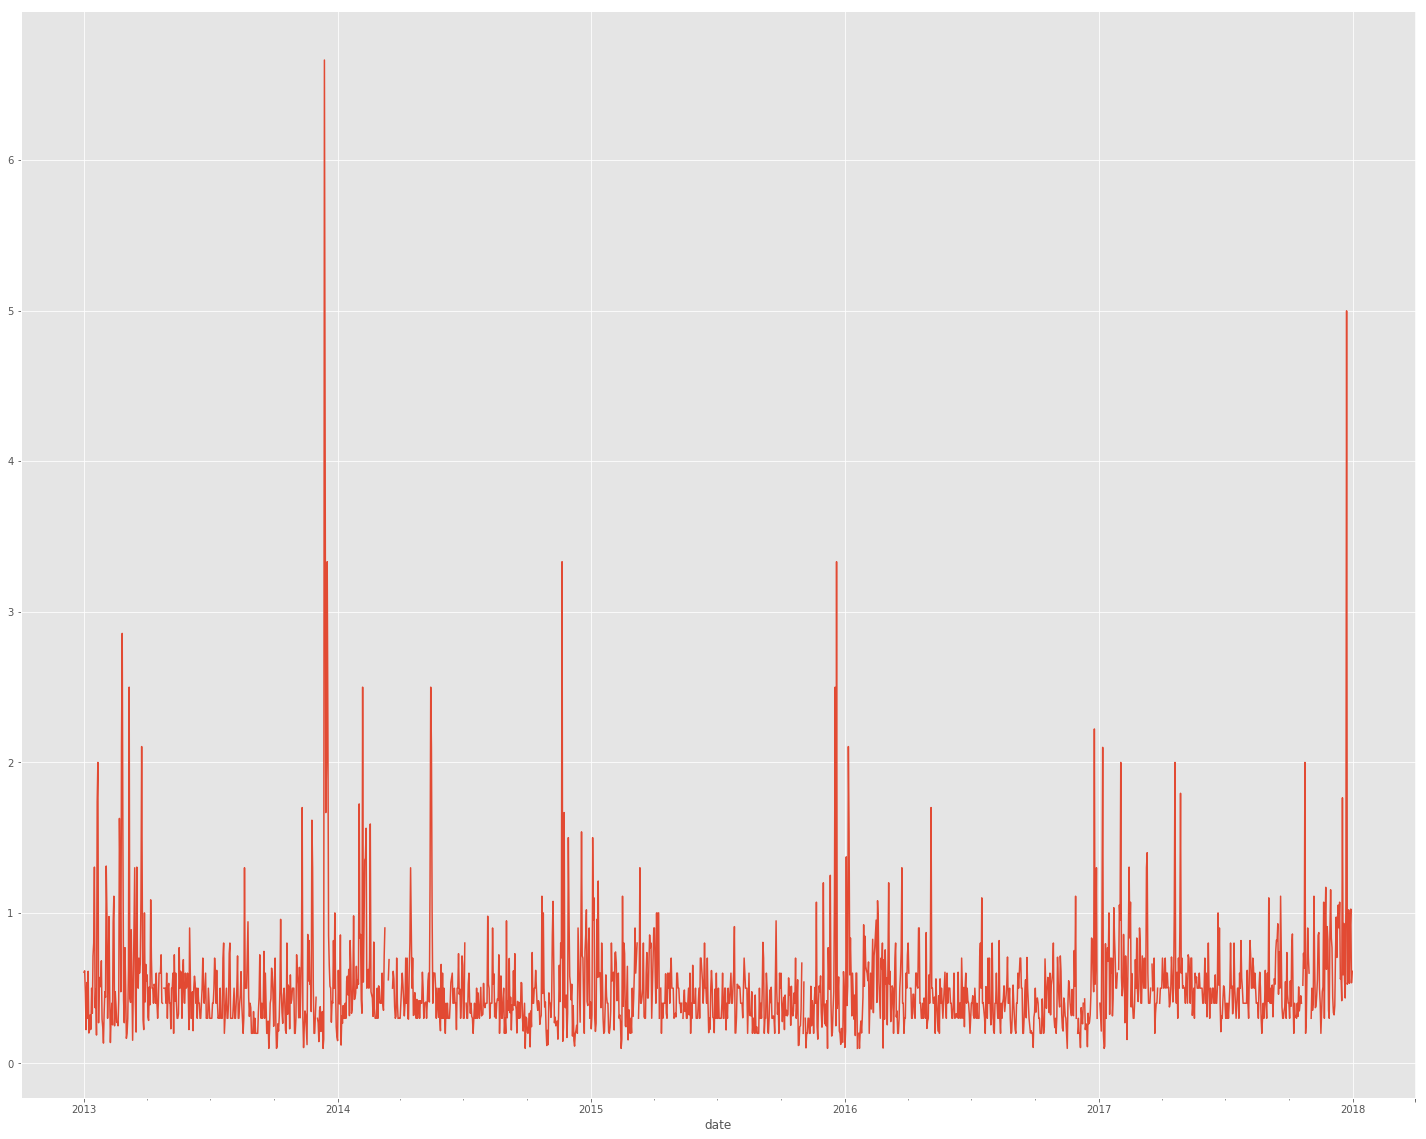

In [24]:
'''Wind speed and visibility'''

data['wspeed/vis'] = pd.Series(data['wind_speed'] / data['visibility']).values
data['wspeed/vis'].plot(figsize=(25, 20))

print("Wind speed and visibility appear to be in more or less linear correlation as well, again with fluctuations during winter.")

Again linear correlation.


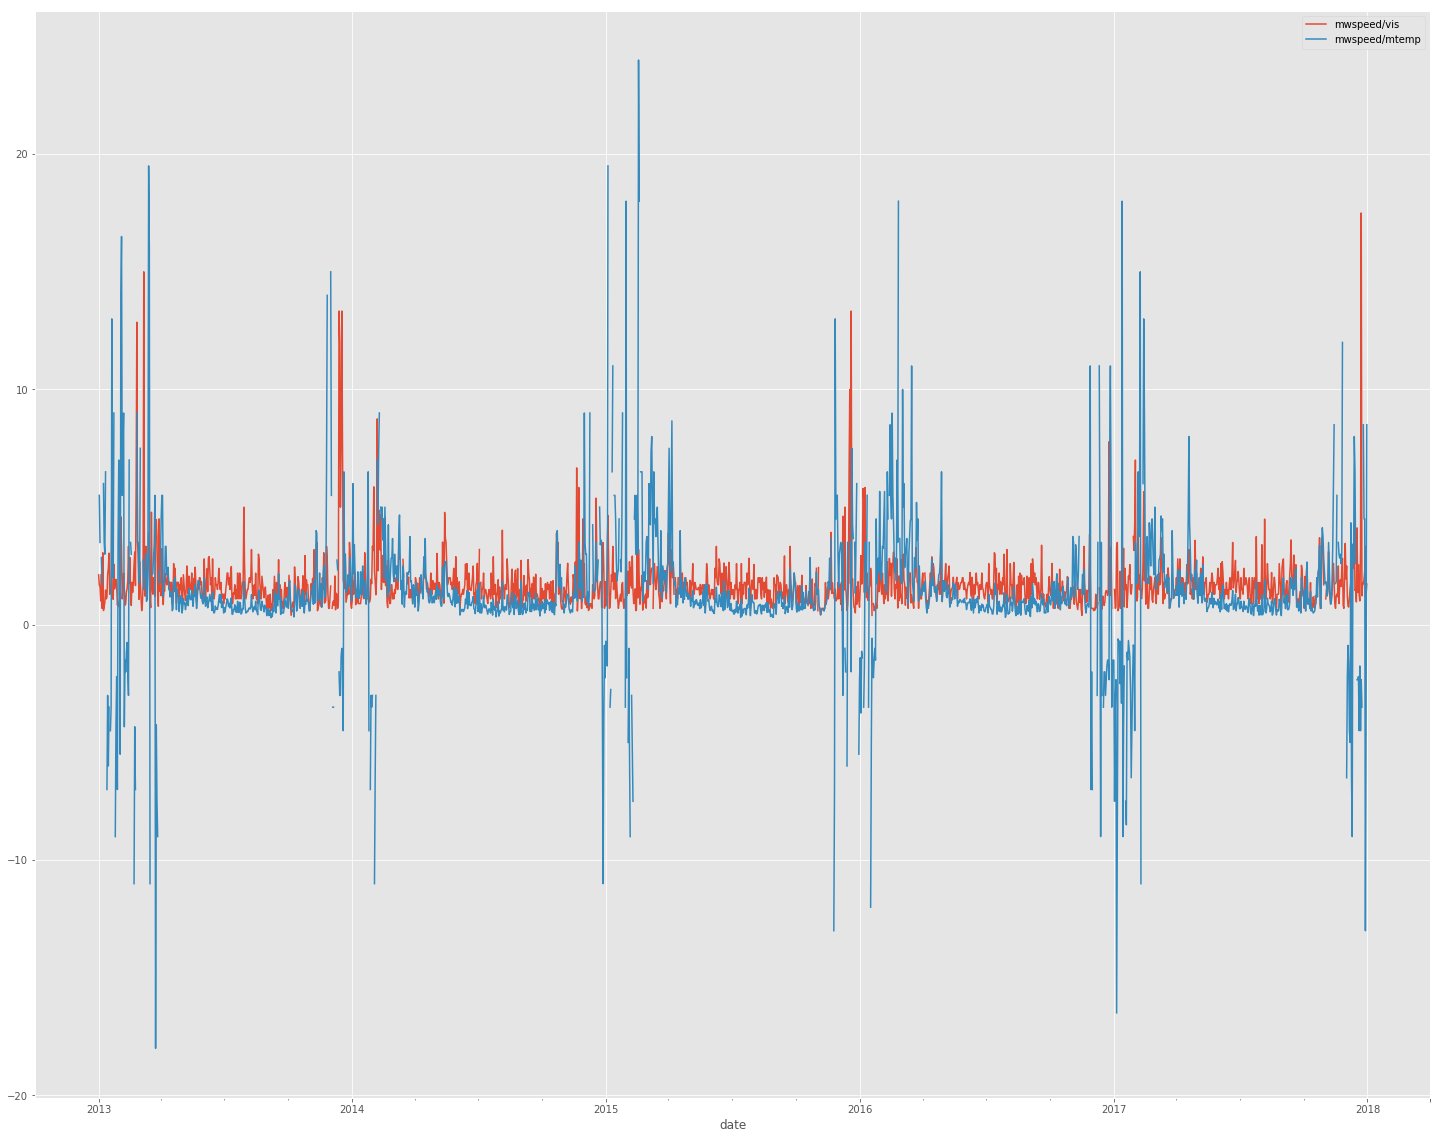

In [37]:
'''What about maximum wind speed and visibility or temperature?'''

data['mwspeed/vis'] = pd.Series(data['max_wind_speed'] / data['visibility']).values
data['mwspeed/mtemp'] = pd.Series(data['max_wind_speed'] / data['mean_temp']).values
data[['mwspeed/vis','mwspeed/mtemp']].plot(figsize=(25, 20))

print("Again linear correlation.")